In [1]:
import os
import pandas as pd
import numpy as np
# Librerías para el procesado de imagen
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image
from collections import defaultdict
from PIL import Image
import imageio
from mlxtend.image import extract_face_landmarks

Using TensorFlow backend.


In [2]:
path = 'CFD-Version-2.0.3-Norming-Data/'

In [3]:
df = pd.read_excel(path + 'CFD 2.0.3 Norming Data and Codebook.xlsx', sheet_name='CFD 2.0.3 Norming Data')

In [4]:
df.head()

,Target,Race,Gender,Age,NumberofRaters,Female_prop,Male_prop,Asian_prop,Black_prop,Latino_prop,...,EyeShape,EyeSize,UpperHeadLength,MidfaceLength,ChinLength,ForeheadHeight,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR
0,AF-200,A,F,32.571429,28,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.404651,0.060924,0.414099,0.326797,0.130719,0.264706,0.388189,91.5,0.545752,1.921146
1,AF-201,A,F,23.666667,27,1.000000,0.000000,0.962963,0.000000,0.000000,...,0.329204,0.041892,0.414414,0.329279,0.144595,0.300901,0.383784,146.0,0.488288,1.901129
2,AF-202,A,F,24.448276,29,0.827586,0.172414,0.310345,0.068966,0.137931,...,0.357939,0.051586,0.411080,0.310317,0.173424,0.298475,0.397029,58.0,0.481333,1.888249
3,AF-203,A,F,22.758621,29,1.000000,0.000000,0.758621,0.000000,0.068966,...,0.443200,0.063913,0.354407,0.343793,0.169820,0.272266,0.421089,87.5,0.500231,1.863719
4,AF-204,A,F,30.137931,29,1.000000,0.000000,0.827586,0.000000,0.068966,...,0.432247,0.053435,0.438931,0.293045,0.180237,0.293893,0.371925,73.5,0.513571,1.935783


In [5]:
df.columns

Index(['Target', 'Race', 'Gender', 'Age', 'NumberofRaters', 'Female_prop',
       'Male_prop', 'Asian_prop', 'Black_prop', 'Latino_prop', 'Multi_prop',
       'Other_prop', 'White_prop', 'Afraid', 'Angry', 'Attractive', 'Babyface',
       'Disgusted', 'Dominant', 'Feminine', 'Happy', 'Masculine', 'Prototypic',
       'Sad', 'Suitability', 'Surprised', 'Threatening', 'Trustworthy',
       'Unusual', 'Luminance_median', 'Nose_Width', 'Nose_Length',
       'Lip_Thickness', 'Face_Length', 'R_Eye_H', 'L_Eye_H', 'Avg_Eye_Height',
       'R_Eye_W', 'L_Eye_W', 'Avg_Eye_Width', 'Face_Width_Cheeks',
       'Face_Width_Mouth', 'Forehead', 'Pupil_Top_R', 'Pupil_Top_L',
       'Asymmetry_pupil_top', 'Pupil_Lip_R', 'Pupil_Lip_L',
       'Asymmetry_pupil_lip', 'BottomLip_Chin', 'Midcheek_Chin_R',
       'Midcheek_Chin_L', 'Cheeks_avg', 'Midbrow_Hairline_R',
       'Midbrow_Hairline_L', 'Faceshape', 'Heartshapeness', 'Noseshape',
       'LipFullness', 'EyeShape', 'EyeSize', 'UpperHeadLength',
       '

In [6]:
df_clean = df[['Target', 'Attractive']]

In [7]:
df_clean.head(10)

,Target,Attractive
0,AF-200,4.111111
1,AF-201,3.111111
2,AF-202,3.000000
3,AF-203,3.275862
4,AF-204,3.172414
5,AF-205,4.333333
6,AF-206,2.714286
7,AF-207,2.137931
8,AF-208,3.038462
9,AF-209,4.080000


In [8]:
print(df_clean.shape)

(597, 2)


In [9]:
all_images = defaultdict(list)
for filename, rating in df_clean.values:
    all_images[filename].append(rating)

In [10]:
ratings = {}
for filename, rating in all_images.items():
    ratings[filename] = np.mean(rating)
print(len(ratings))

597


In [11]:
value = []
path2 = path + 'Images/'
path3 = path + 'Images_resized/'
for filename in os.listdir(path2):
    img_path = path2 + filename
    img = image.load_img(img_path)
    img.thumbnail((300,300), Image.ANTIALIAS)
    img.save(path3 + filename, "JPEG")
    value.append(ratings[filename[:6]])
print(len(value))

597


In [12]:
images_array = []
landmarks = []
for filename in os.listdir(path3):
    img = imageio.imread(path3 + filename)
    landmark = extract_face_landmarks(img)
    img = image.img_to_array(img)
    images_array.append(img)
    landmarks.append(landmark)

In [13]:
print('Shape of landmarks: {}x{}'.format(len(landmarks[0]), len(landmarks[0][0])))
print('\nFirst 10 landmarks:\n', landmarks[0][:10])

Shape of landmarks: 68x2

First 10 landmarks:
 [[ 98 100]
 [ 99 113]
 [102 125]
 [105 137]
 [109 150]
 [117 160]
 [127 169]
 [137 176]
 [151 179]
 [164 177]]


Rating: 4.111111111


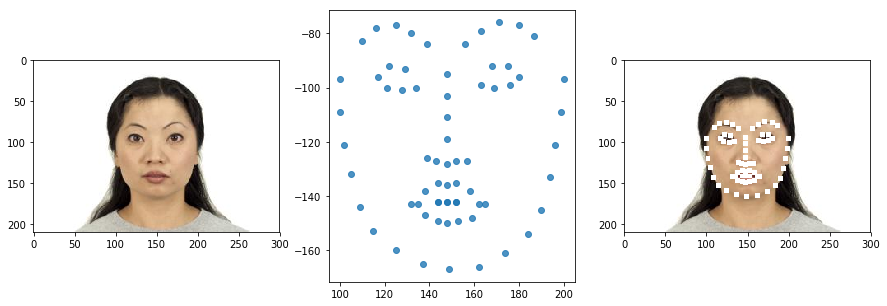

In [32]:
def plot_landmarks(img, landmarks):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(img/255.0)
    ax = fig.add_subplot(1, 3, 2)
    ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
    ax = fig.add_subplot(1, 3, 3)
    img2 = img.copy()
    for p in landmarks:
        img2[p[1]-3:p[1]+3,p[0]-3:p[0]+3,:] = (255, 255, 255)
    ax.imshow(img2/255.0)
    plt.show()
print('Rating: {}'.format(value[16]))
plot_landmarks(images_array[16], landmarks[16])

In [15]:
data_zipped = list(zip(images_array, value, landmarks))
data_zipped

[(array([[[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
  
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
  
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
  
         ...,
  
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [254., 254., 254.],
          [254., 254., 254.],
          [254., 254., 254.]],
  
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [250., 250.,

In [33]:
data = pd.DataFrame(data_zipped, columns=['Images','Rating', 'Landmarks'])
data.head()

,Images,Rating,Landmarks
0,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...",3.821429,"[[98, 100], [99, 113], [102, 125], [105, 137],..."
1,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...",2.777778,"[[96, 98], [98, 111], [100, 125], [102, 138], ..."
2,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...",3.280000,"[[103, 94], [103, 107], [105, 120], [108, 132]..."
3,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...",3.857143,"[[98, 96], [100, 110], [102, 124], [105, 137],..."
4,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...",3.000000,"[[99, 100], [100, 112], [102, 123], [104, 135]..."
